In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from dhdrnet.util import ROOT_DIR, DATA_DIR
stats_dir = ROOT_DIR / "precomputed_data"
fig_dir = ROOT_DIR / "figures" / "ev_choices" / "ev_correct"
plt.rcParams['figure.figsize'] = (10,10)

In [3]:
from dhdrnet.histogram_classifier import to_histogram

In [4]:
image_names = list(pd.read_csv(stats_dir / "test_current.csv")["names"])
sample_size = 15
name_sample = random.sample(image_names, sample_size)
name_sample

['0543_20150918_085310_081',
 '4KK2_20150829_114436_968',
 '0030_20151217_221631_804',
 '6FHF_20150303_112002_929',
 '6FHF_20150331_114842_635',
 'bee7_20150818_172558_552',
 '33TJ_20150820_184024_893',
 'JN34_20150319_221026_313',
 '5066_20160628_183724_137',
 '33TJ_20150819_103115_707',
 '4WBR_20150501_220443_057',
 '0543_20150919_083628_226',
 'c1b1_20150424_192343_588',
 '0043_20160920_193816_345',
 '0039_20141008_120400_718']

/home/shane/.cache/pypoetry/virtualenvs/dhdrnet-md5k9ngR-py3.8/lib/python3.8/site-packages/colour/utilities/verbose.py:235: ColourWarning: "Adobe DNG Converter" is not available on your platform!
  warn(*args, **kwargs)


/home/shane/Development/DHDRNet/data/correct_exposures/exposures/exposures


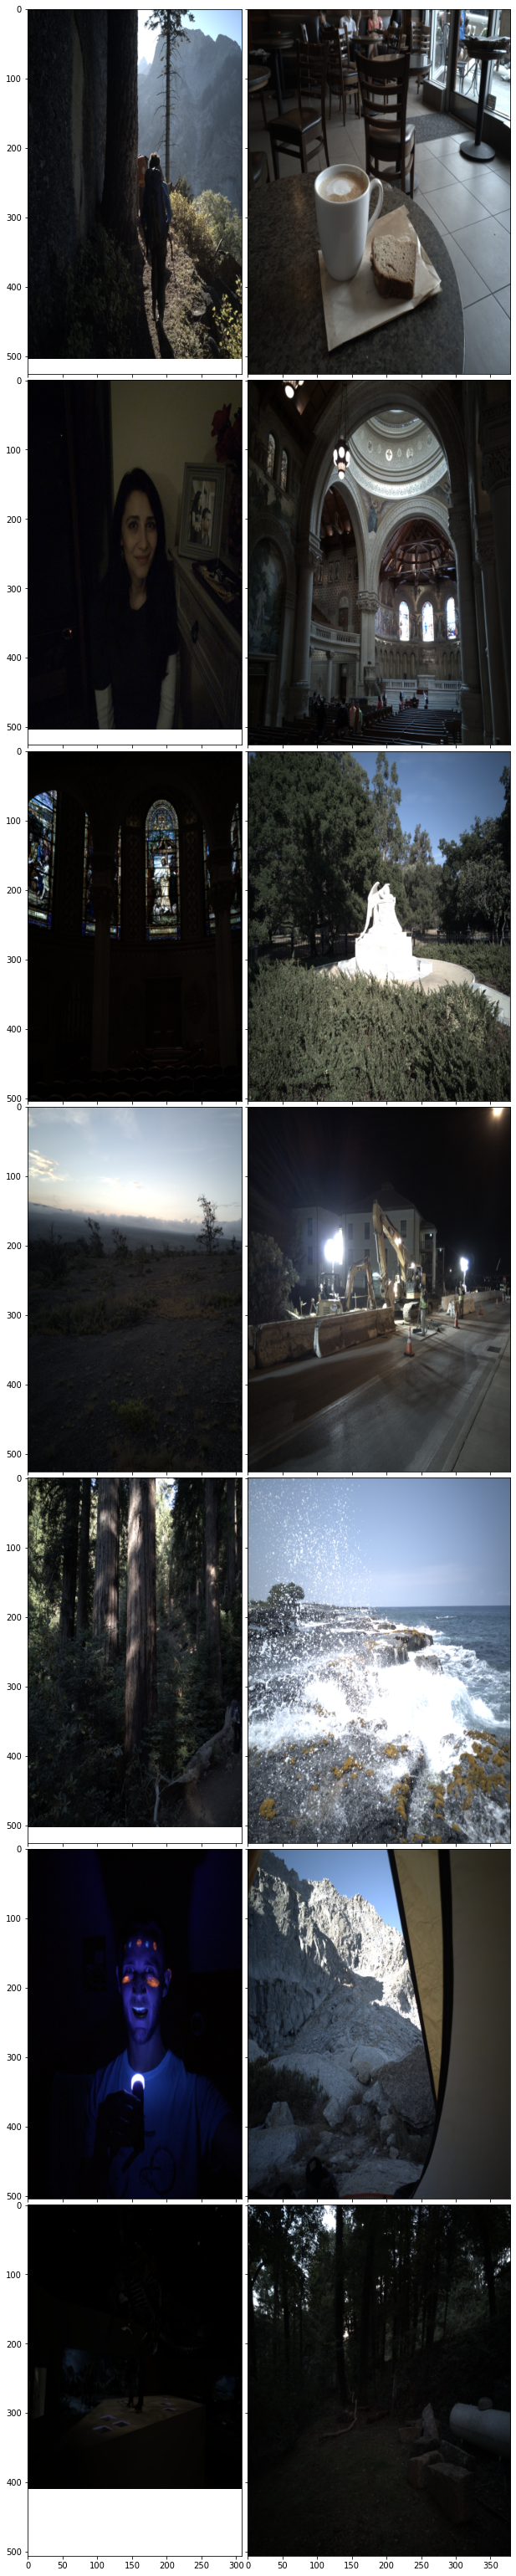

In [5]:
# using the data generator to get the proper images
from dhdrnet.gen_pairs import GenAllPairs
from more_itertools import one
from dhdrnet.vis_util import rgb_bgr_swap, show_image_grid

gen = GenAllPairs(
    raw_path=DATA_DIR/"dngs",
    out_path=DATA_DIR/"correct_exposures"/"exposures",
    store_path=None,
    compute_scores=False
)
sample_mid_exposures = [rgb_bgr_swap(one(gen.get_exposures(name, [0.0]))) for name in name_sample]
show_image_grid(sample_mid_exposures)

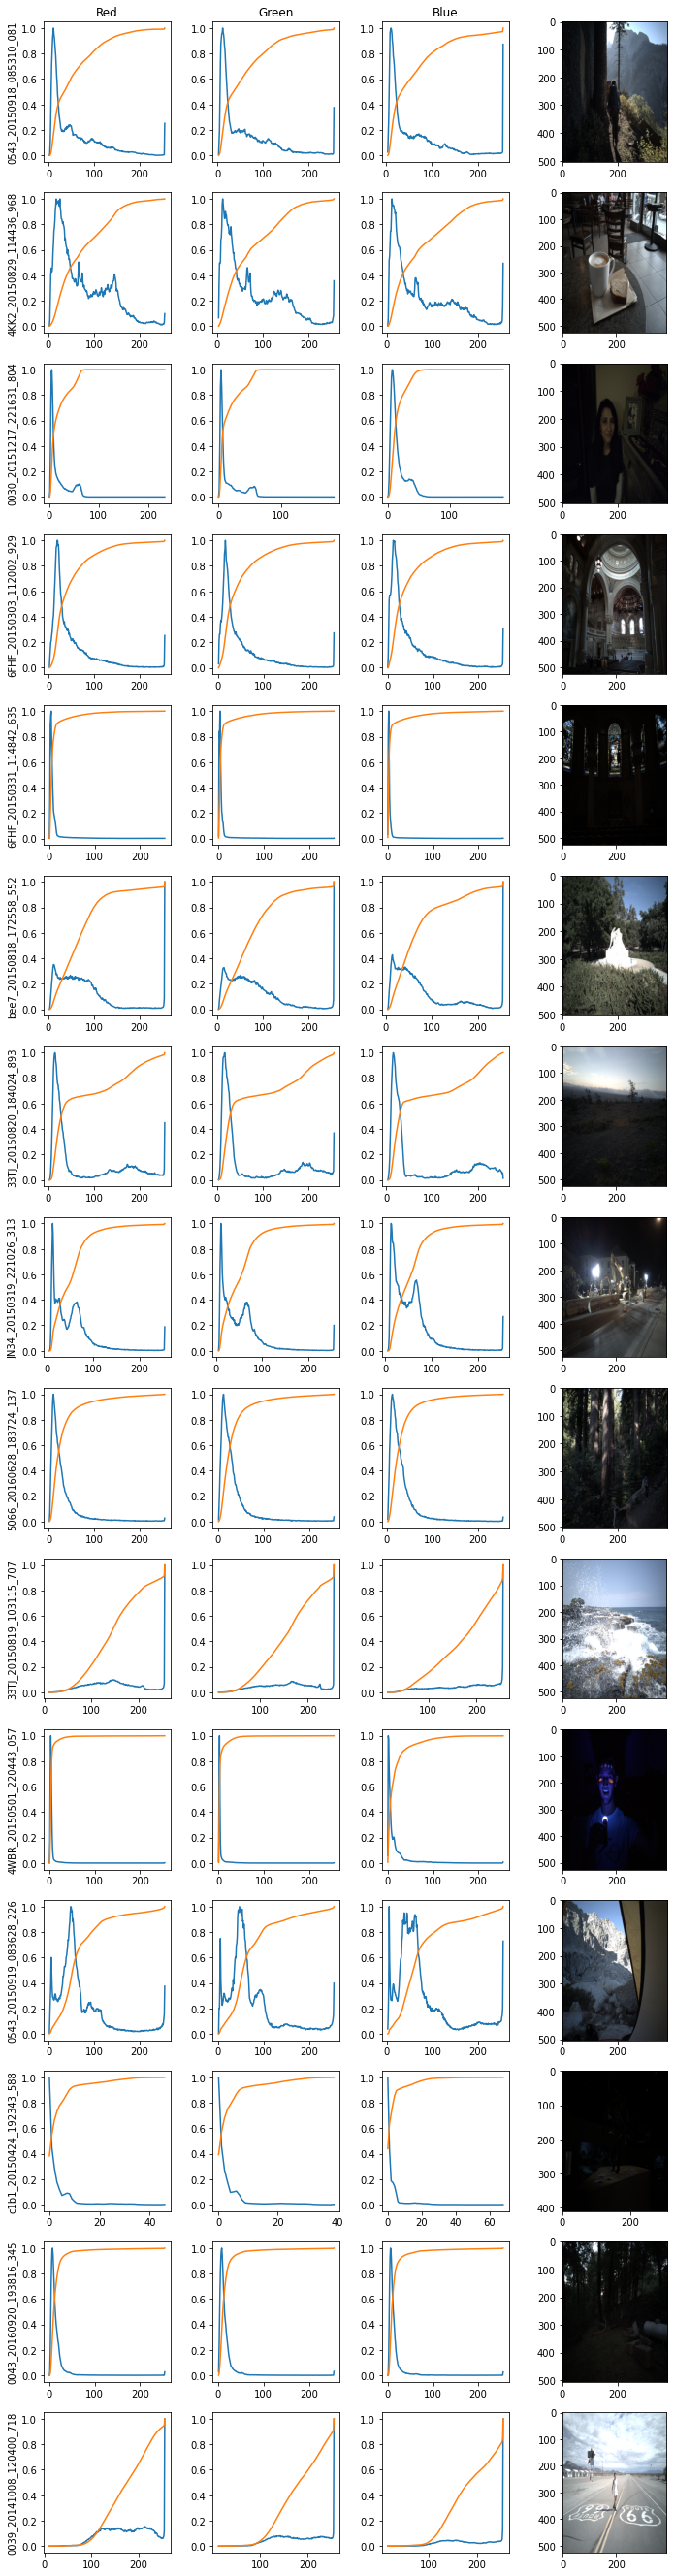

In [6]:
from skimage import exposure

ncols = 4
fig, axes = plt.subplots(
    nrows=sample_size,
    ncols=ncols,
    figsize=[int(2.5 * i) for i in (ncols, sample_size)],
)
for i, image in enumerate(sample_mid_exposures):
    for c, colour in enumerate(("red", "green", "blue", "src")):
        if colour == "src":
            axes[i, c].imshow(image)
            continue

        hist, bins = exposure.histogram(image[..., c], nbins=100)
        axes[i, c].plot(bins, hist / hist.max())
        image_cdf, bins = exposure.cumulative_distribution(image[..., c], nbins=100)
        axes[i, c].plot(bins, image_cdf)
        axes[i, 0].set_ylabel(name_sample[i])

axes[0, 0].set_title("Red")
axes[0, 1].set_title("Green")
axes[0, 2].set_title("Blue")

plt.tight_layout()
plt.show()


In [9]:
import pytorch_lightning as pl
from dhdrnet.histogram_model import HistogramNet

model = HistogramNet(bins=100)
trainer = pl.Trainer(gpus=1)

trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]


/home/shane/Development/DHDRNet/data/correct_exposures/exposures


/home/shane/.cache/pypoetry/virtualenvs/dhdrnet-md5k9ngR-py3.8/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:37: UserWarning: Could not log computational graph since the `model.example_input_array` attribute is not set or `input_array` was not given
  warnings.warn(*args, **kwargs)

  | Name  | Type   | Params
---------------------------------
0 | model | Linear | 3 K   


/home/shane/Development/DHDRNet/data/correct_exposures/exposures


/home/shane/.cache/pypoetry/virtualenvs/dhdrnet-md5k9ngR-py3.8/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:37: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)
Saving latest checkpoint..


1